In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as pyplot
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# EDA

In [2]:
data = pd.read_csv('album_to_track_df.csv', header = 0)

In [3]:
data.head()

,Unnamed: 0,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening - Live,6KOn7RweqUBSZWoKKkHFRb,0.209,0.963,6.0,-12.900,0.0,0.1330,0.00009,0.913000,0.322,0.0829,131.864,90333.0,4.0
1,1,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,I yah! - Live,1khANf67sdS8kUkjmF218J,0.397,0.901,4.0,-6.970,1.0,0.2850,0.06650,0.000000,0.888,0.2580,171.944,278333.0,4.0
2,2,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Git It Up! / 전사의 후예 / You Got Gun - Live,4XkT2bHdbHMPukCpj7mXPJ,0.542,0.913,1.0,-7.763,1.0,0.2410,0.10800,0.000315,0.890,0.3770,97.051,320533.0,4.0
3,3,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening Ment - Live,65a4TY00ChiawzHVH4xcDO,0.436,0.666,10.0,-14.143,0.0,0.6320,0.92500,0.000267,0.855,0.0800,107.013,284427.0,5.0
4,4,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,It's Been Raining Since You Left Me / Delight ...,3vYZaL9lMZ1uKURbcEq4Jz,0.366,0.778,7.0,-9.239,0.0,0.0714,0.16400,0.000214,0.891,0.4040,99.995,278667.0,4.0


In [4]:
data.columns

Index(['Unnamed: 0', 'Artist', 'Artist_Id', 'Album_Name', 'Album_Id',
       'Track_Title', 'Track_Id', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

### Quick Check

In [5]:
data.Artist.value_counts()

F.T. Island     841
CNBLUE          523
Super Junior    515
TVXQ            397
BIGBANG         396
               ... 
Mirani            7
Park Boram        7
DEAN              7
Eddy Kim          7
RM                7
Name: Artist, Length: 206, dtype: int64

In [6]:
data.Album_Name.value_counts()

PROPHET                                            66
SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR             45
As Time Goes By                                    45
Master`s sun OST                                   44
4 the Youth                                        44
                                                   ..
Summer Special 'Loving U'                           7
INSANE LOVE                                         7
미친거 아니야? GO CRAZY! Grand Edition                    7
GARDEN                                              7
NCT #127 WE ARE SUPERHUMAN - The 4th Mini Album     6
Name: Album_Name, Length: 1189, dtype: int64

### Feature Relationships

In [7]:
audio_feature_subset_df = data[['Artist',
                                'danceability', 
                                'energy', 
                                'loudness', 
                                'speechiness', 
                                'acousticness', 
                                'instrumentalness', 
                                'liveness',
                                'valence']]

pop_audio_df = audio_feature_subset_df[(audio_feature_subset_df['Artist'] == "TWICE") 
                                        | (audio_feature_subset_df['Artist'] == "BTS")
                                        | (audio_feature_subset_df['Artist'] == "Super Junior")]

In [8]:
audio_feature_subset_df.danceability

0        0.209
1        0.397
2        0.542
3        0.436
4        0.366
         ...  
16325    0.650
16326    0.703
16327    0.655
16328    0.614
16329    0.683
Name: danceability, Length: 16330, dtype: float64

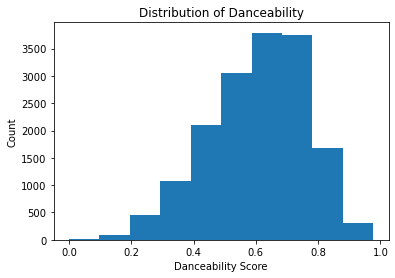

In [9]:
pyplot.hist(audio_feature_subset_df.danceability)
pyplot.xlabel('Danceability Score') 
pyplot.ylabel('Count') 
pyplot.title("Distribution of Danceability")
pyplot.show() 

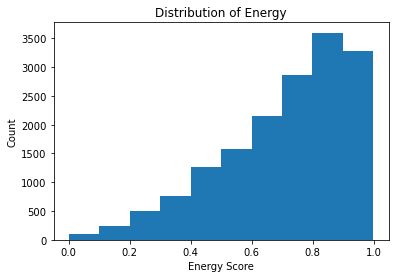

In [10]:
pyplot.hist(audio_feature_subset_df.energy)
pyplot.xlabel('Energy Score') 
pyplot.ylabel('Count') 
pyplot.title("Distribution of Energy")
pyplot.show() 

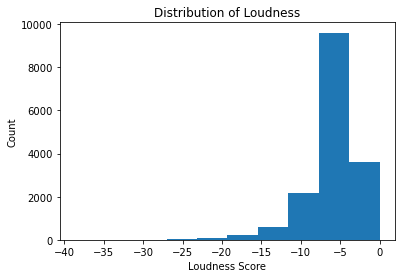

In [11]:
pyplot.hist(audio_feature_subset_df.loudness)
pyplot.xlabel('Loudness Score') 
pyplot.ylabel('Count') 
pyplot.title("Distribution of Loudness")
pyplot.show() 

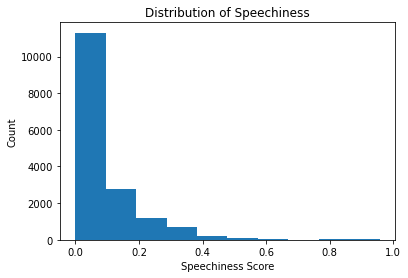

In [12]:
pyplot.hist(audio_feature_subset_df.speechiness)
pyplot.xlabel('Speechiness Score') 
pyplot.ylabel('Count') 
pyplot.title("Distribution of Speechiness")
pyplot.show() 

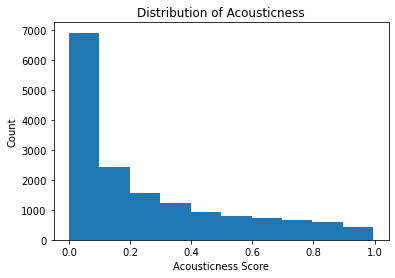

In [13]:
pyplot.hist(audio_feature_subset_df.acousticness)
pyplot.xlabel('Acousticness Score') 
pyplot.ylabel('Count') 
pyplot.title("Distribution of Acousticness")
pyplot.show() 

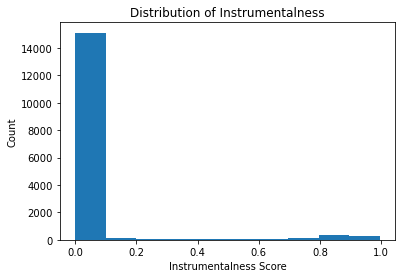

In [14]:
pyplot.hist(audio_feature_subset_df.instrumentalness)
pyplot.xlabel('Instrumentalness Score') 
pyplot.ylabel('Count') 
pyplot.title("Distribution of Instrumentalness")
pyplot.show() 

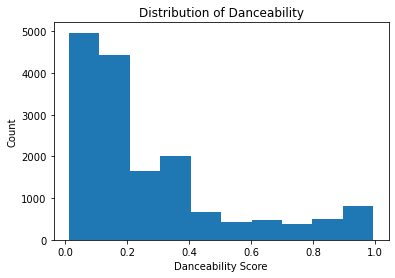

In [15]:
pyplot.hist(audio_feature_subset_df.liveness)
pyplot.xlabel('Danceability Score') 
pyplot.ylabel('Count') 
pyplot.title("Distribution of Danceability")
pyplot.show() 

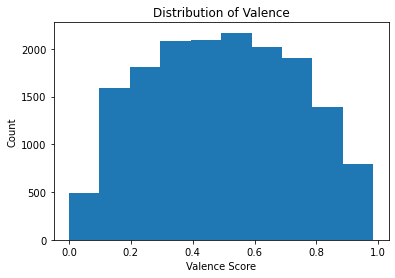

In [16]:
pyplot.hist(audio_feature_subset_df.valence)
pyplot.xlabel('Valence Score') 
pyplot.ylabel('Count') 
pyplot.title("Distribution of Valence")
pyplot.show() 

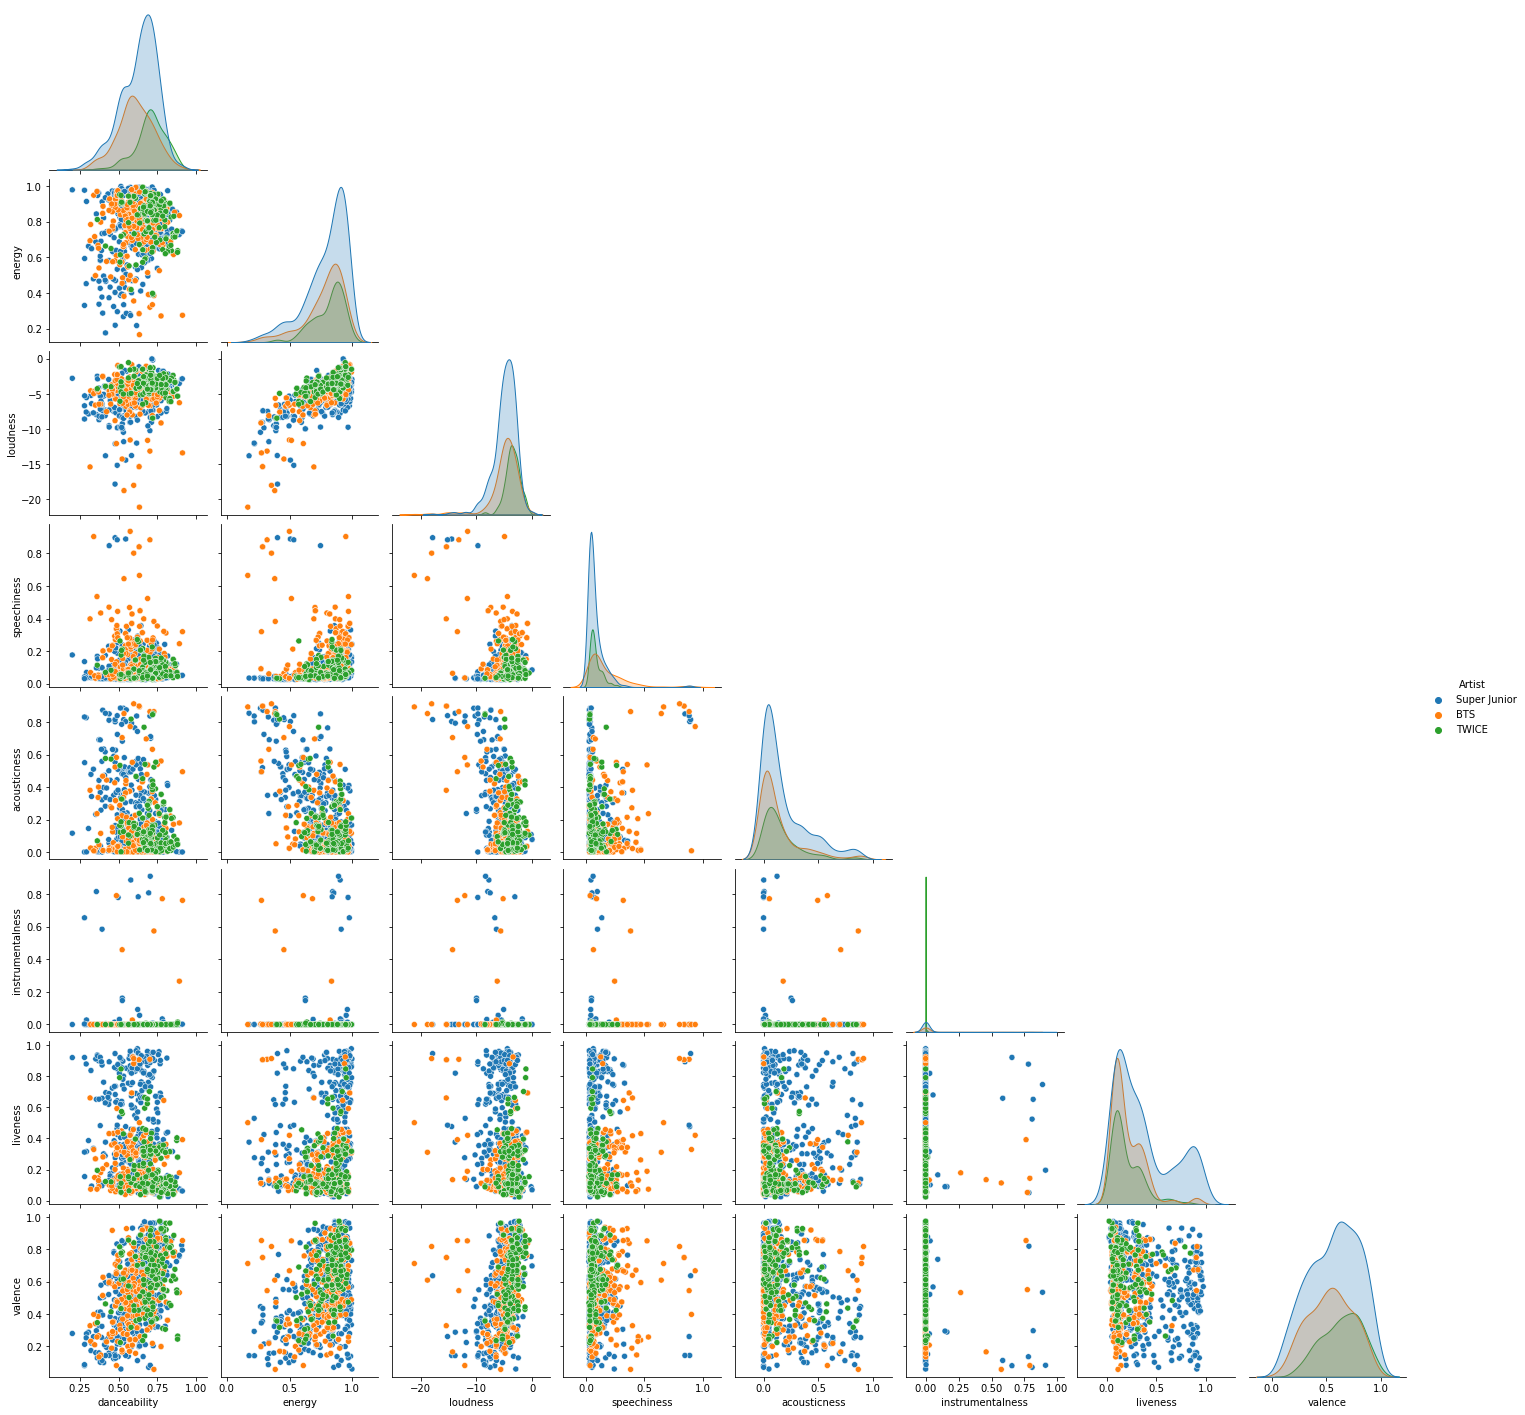

In [17]:
seaborn.pairplot(pop_audio_df, hue = "Artist", corner=True)

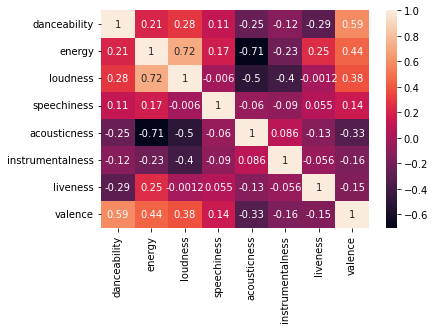

In [18]:
pop_corr_mat = audio_feature_subset_df.corr()
seaborn.heatmap(pop_corr_mat, annot = True)
pyplot.show()

There appears to be a strong positive relationship between energy and loudness as well as danceability and valence. Other features do not appear to have as strong of a positive correlation for pop artists. There does appear to be a slight negative relationship between energy and acousticness. 

### Calculating Averages on an Artist Level

In [19]:
artist_lvl_df = data[['Artist', 'Album_Name','Track_Title', 'Track_Id', 
            'danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_ms', 'time_signature']]

In [20]:
artist_lvl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16330 entries, 0 to 16329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            16330 non-null  object 
 1   Album_Name        16330 non-null  object 
 2   Track_Title       16330 non-null  object 
 3   Track_Id          16322 non-null  object 
 4   danceability      16322 non-null  float64
 5   energy            16322 non-null  float64
 6   key               16322 non-null  float64
 7   loudness          16322 non-null  float64
 8   mode              16322 non-null  float64
 9   speechiness       16322 non-null  float64
 10  acousticness      16322 non-null  float64
 11  instrumentalness  16322 non-null  float64
 12  liveness          16322 non-null  float64
 13  valence           16322 non-null  float64
 14  tempo             16322 non-null  float64
 15  duration_ms       16322 non-null  float64
 16  time_signature    16322 non-null  float6

In [21]:
null_artist_lvl_df = artist_lvl_df[artist_lvl_df.isnull().any(axis=1)]
null_artist_lvl_df.head(n=10)

,Artist,Album_Name,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
149,SECHSKIES,2016 Re-ALBUM,COME TO ME BABY (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6106,BTOB,24/7 (TWENTY FOUR/SEVEN),Beyond the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8125,Drunken Tiger,Drunken Tiger X: Rebirth of Tiger Jk,Intro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8431,Epik High,WE'VE DONE SOMETHING WONDERFUL,BLEED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12665,Seotaiji,Seotaiji 7th Issue,Intro (For Zero Tour) - '04 Zero [Live],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13377,Hwang Chi Yeul,The Four Seasons,A Walk To Goodbye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14026,Kim Jong Kook,Here I Am,고맙다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15390,Lee Seung Chul,청연 (Original Soundtrack),인연,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Due to the relatively small amount of tracks missing information (8) and the number of artists affected (8), the rows containing these missing values will be dropped. Work will be done in the future to ensure that less data is dropped. 

In [22]:
artist_lvl_df = artist_lvl_df.dropna() 

In [23]:
artist_lvl_summary_stats = artist_lvl_df.groupby("Artist")["danceability", 
                                                            "loudness", 
                                                            "energy", 
                                                            "speechiness", 
                                                            "acousticness", 
                                                            "instrumentalness", 
                                                            "liveness", 
                                                            "valence"].mean()

/var/folders/pj/f2k8dvxj4xx9c67b01l_14xm0000gn/T/ipykernel_28608/896365415.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  artist_lvl_summary_stats = artist_lvl_df.groupby("Artist")["danceability",


In [24]:
artist_lvl_summary_stats.head(n=1)

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence
Artist,,,,,,,,
2AM,0.5816,-6.417889,0.591067,0.043758,0.438364,0.091031,0.155602,0.424971


In [25]:
twice_artist_lvl = artist_lvl_summary_stats.filter(items = ['TWICE'], axis = 0)
bts_artist_lvl = artist_lvl_summary_stats.filter(items = ['BTS'], axis = 0)
super_junior_artist_lvl = artist_lvl_summary_stats.filter(items = ['Super Junior'], axis = 0)

---

In [26]:
twice_artist_lvl

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence
Artist,,,,,,,,
TWICE,0.707305,-3.520561,0.811348,0.082116,0.158088,0.000293,0.200203,0.641762


In [27]:
bts_artist_lvl

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence
Artist,,,,,,,,
BTS,0.608919,-4.954178,0.776444,0.165362,0.137211,0.014152,0.210104,0.538125


In [28]:
super_junior_artist_lvl

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence
Artist,,,,,,,,
Super Junior,0.630713,-4.924616,0.792365,0.080272,0.181358,0.013293,0.367862,0.571023


When comparing Twice and BTS, we can see how BTS is significantly higher in speechiness. We can also observe differences in danceability, instrumentalness and valence. Using the Spotify provided [data dictionary](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features), we find that speechiness values below 0.33 likely "represent music and other non-speech-like tracks." Since both of these artists are pop artists, this value indicates further investigation is required – are instrumental tracks being included in the dataset? Our other features reflect a higher danceability and valence scores for Twice than BTS and a lower instrumentalness score. 

Super Junior, an older pop group, reflects feature values similar to BTS and Twice. We also observe that the instrumentalness score is close in value to BTS, but not to Twice, despite having a similar speechiness score as Twice. Further analysis will be needed to identify the cause of this. Could it be due to an outlier(s)? 

### Calculating Averages on an Artist - Album Level

In [29]:
album_lvl_df = data[['Artist', 'Album_Name', "Album_Id", 
                    'Track_Title',  'danceability', 'energy', 
                    'key', 'loudness', 'mode', 'speechiness', 
                    'acousticness', 'instrumentalness', 'liveness',
                    'valence', 'tempo', 'duration_ms', 'time_signature']].dropna()

In [30]:
album_lvl_summary_stats = album_lvl_df.groupby("Album_Name")["danceability", 
                                                            "loudness", 
                                                            "energy", 
                                                            "speechiness", 
                                                            "acousticness", 
                                                            "instrumentalness", 
                                                            "liveness", 
                                                            "valence"].mean()

/var/folders/pj/f2k8dvxj4xx9c67b01l_14xm0000gn/T/ipykernel_28608/1508410065.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  album_lvl_summary_stats = album_lvl_df.groupby("Album_Name")["danceability",


In [31]:
album_lvl_summary_stats = pd.merge(album_lvl_summary_stats, data[["Artist", "Album_Name"]], on = "Album_Name", how = "inner")
album_lvl_summary_stats = album_lvl_summary_stats.drop_duplicates()
album_lvl_summary_stats.head(n=3)

,Album_Name,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,Artist
0,"""Forever"" [Goodbye Jin,Sun,Mi]",0.47085,-4.523650,0.669500,0.053220,0.503660,0.000018,0.213420,0.3795,Song Ga In
20,"""TO INFINITY.""",0.71050,-5.714400,0.682300,0.137170,0.294500,0.000000,0.218060,0.5043,MINO
30,#1 Vol. II Instrumental,0.72400,-6.807875,0.591625,0.087531,0.057176,0.636924,0.185775,0.6180,Swings


In [32]:
twice_album_lvl = album_lvl_summary_stats[album_lvl_summary_stats['Artist'] == 'TWICE']
bts_album_lvl = album_lvl_summary_stats[album_lvl_summary_stats['Artist'] == 'BTS']
super_junior_album_lvl = album_lvl_summary_stats[album_lvl_summary_stats['Artist'] == 'Super Junior']

In [33]:
twice_album_lvl

,Album_Name,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,Artist
94,&TWICE,0.740300,-3.965200,0.815800,0.095520,0.086470,8.386530e-04,0.196280,0.709100,TWICE
104,&TWICE (Repackage),0.737455,-3.976091,0.809000,0.092036,0.080573,7.625327e-04,0.188527,0.708455,TWICE
1764,BDZ,0.678300,-2.838400,0.851300,0.067160,0.138798,1.219000e-05,0.143970,0.675200,TWICE
1774,BDZ (Repackage),0.680818,-2.909545,0.855273,0.065618,0.132262,1.108182e-05,0.152427,0.664909,TWICE
4242,Eyes Wide Open,0.686692,-3.717077,0.798846,0.102338,0.146569,1.624615e-06,0.224100,0.595846,TWICE
4559,Feel Special,0.725286,-3.321286,0.848429,0.086114,0.067671,5.023629e-04,0.190086,0.682857,TWICE
4683,Formula of Love: O+T=<3,0.753000,-3.427625,0.806250,0.096287,0.146294,6.333125e-06,0.130569,0.697500,TWICE
8345,MORE & MORE,0.707286,-3.696857,0.838143,0.090400,0.052307,2.586071e-04,0.276514,0.606000,TWICE
8654,Merry & Happy,0.739667,-3.955867,0.780600,0.058313,0.265047,1.046166e-03,0.159947,0.617467,TWICE
10150,Perfect World,0.711000,-3.859500,0.736500,0.077590,0.164763,3.197800e-05,0.194600,0.599200,TWICE


In [34]:
twice_album_lvl.describe()

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,16.000000,16.000000,16.000000,16.000000,16.000000,1.600000e+01,16.000000,16.000000
mean,0.701600,-3.470288,0.815280,0.083224,0.151334,2.650794e-04,0.211095,0.641468
std,0.036792,0.468736,0.033865,0.015740,0.075587,3.689361e-04,0.074915,0.045358
min,0.642857,-4.212308,0.736500,0.058313,0.052307,7.628571e-07,0.130569,0.572333
25%,0.673361,-3.883592,0.794285,0.068515,0.096284,6.237066e-06,0.163875,0.604300
50%,0.696989,-3.488979,0.817471,0.086429,0.136416,3.207400e-05,0.192343,0.628556
75%,0.738008,-3.119720,0.843357,0.095712,0.183887,5.468052e-04,0.221186,0.677114
max,0.756692,-2.796143,0.855273,0.109443,0.293944,1.046166e-03,0.419143,0.709100


We can see that several features including danceability and energy do not have a very large standard deviation, but there is a wide range of values for features such as acousticness and instrumentalness. Referring back to the table listing all of the Twice albums contained within this dataset, we can see that some albums such as *&TWICE* and *Yes or Yes* have significantly lower instrumentalness values than, say, *Merry and Happy*. 

In [35]:
data[(data["Album_Name"]  == "Merry & Happy")]

,Unnamed: 0,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
5199,5199,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,Heart Shaker,52FCAZn0YEkZfF0BtiAUMW,0.564,0.944,8.0,-0.532,1.0,0.0647,0.1050,0.000000,0.1540,0.857,164.062,186893.0,4.0
5200,5200,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,Merry & Happy,59TGiILFEI1NYSFcxyFiUZ,0.716,0.630,10.0,-4.122,1.0,0.0377,0.4030,0.000000,0.0817,0.666,154.077,192573.0,4.0
5201,5201,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,Likey,7MXzQjonTIslNqRpm7ouIK,0.720,0.904,4.0,-1.276,0.0,0.0332,0.4370,0.000551,0.1170,0.428,131.988,207813.0,4.0
5202,5202,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,Turtle,00Cng9YenhxNXRyZTNcYZW,0.729,0.808,1.0,-3.593,1.0,0.1350,0.5230,0.000000,0.1600,0.623,95.079,198040.0,4.0
5203,5203,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,Missing U,3HuLZF0nBNoXqVghfTVjme,0.808,0.710,1.0,-3.675,1.0,0.0482,0.2200,0.000000,0.1120,0.849,119.976,179707.0,4.0
5204,5204,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,Wow,19SVVy0W0AAWzTKZ9CQByS,0.775,0.914,1.0,-3.642,1.0,0.1490,0.3550,0.000000,0.0547,0.922,160.118,180960.0,4.0
5205,5205,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,Ffw,54tPbA8xDgU32dESUR2bNd,0.711,0.949,6.0,-2.324,0.0,0.0431,0.1260,0.000003,0.2960,0.928,127.976,225987.0,4.0
5206,5206,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,Ding Dong,1sRQqInj0p7N8XRdgSSNQe,0.661,0.881,11.0,-3.451,1.0,0.0510,0.0525,0.000000,0.2240,0.801,149.995,212120.0,4.0
5207,5207,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,24/7,2JzPQPg0Sq9s3EcBJsBn2D,0.877,0.744,6.0,-4.311,1.0,0.0705,0.0678,0.000026,0.3870,0.548,123.067,215480.0,4.0
5208,5208,TWICE,7n2Ycct7Beij7Dj7meI4X0,Merry & Happy,0R7pj4tnmcoUulrZGPo6nw,Look At Me,1cdWR6r36caIdPC6gPFh8X,0.719,0.913,1.0,-3.541,1.0,0.0386,0.1650,0.000000,0.0687,0.635,134.888,193147.0,4.0


In [36]:
data[(data["Album_Name"]  == "&TWICE")]

,Unnamed: 0,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
5136,5136,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,Fake & True,4u04u2pxwZtPKCbURB24GT,0.678,0.808,5.0,-3.973,0.0,0.0599,0.0569,0.000000,0.2880,0.765,125.938,219625.0,4.0
5137,5137,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,Stronger,7m9xWqWjyXPzBP1jNbtPrA,0.832,0.900,9.0,-5.645,1.0,0.0647,0.0217,0.000138,0.3150,0.962,127.041,194973.0,4.0
5138,5138,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,Breakthrough,4270Icl47bsR6qAfSfpqP4,0.868,0.728,6.0,-3.338,0.0,0.1100,0.0439,0.000000,0.0975,0.616,112.006,217651.0,4.0
5139,5139,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,Changing!,4kgu9eJvgj8gOCEh5YKb3x,0.832,0.904,7.0,-3.116,0.0,0.0729,0.2610,0.000290,0.0932,0.810,120.040,222093.0,4.0
5140,5140,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,HAPPY HAPPY,6ZMcwaCE15KXhjsAd5M3Vd,0.609,0.932,10.0,-1.562,1.0,0.1450,0.1730,0.000946,0.3960,0.755,179.995,206974.0,4.0
5141,5141,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,What You Waiting For,25RWkl9jIFBN1ynlthsnsh,0.754,0.910,10.0,-3.415,0.0,0.0735,0.0240,0.000003,0.3020,0.695,119.972,201600.0,4.0
5142,5142,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,Be OK,7Cyj9DCOFZpMHa5bi42dlA,0.854,0.714,0.0,-4.641,1.0,0.1490,0.0305,0.000000,0.0413,0.634,115.017,188840.0,4.0
5143,5143,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,POLISH,2LqjwaWigfLE2G0CoPaSmr,0.642,0.874,7.0,-5.134,1.0,0.2060,0.1140,0.000310,0.0397,0.888,204.112,181693.0,4.0
5144,5144,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,How u doin',3SSsWyiigwW44UO14r1HzQ,0.677,0.745,7.0,-3.771,0.0,0.0463,0.0237,0.006700,0.0541,0.430,83.482,209467.0,4.0
5145,5145,TWICE,7n2Ycct7Beij7Dj7meI4X0,&TWICE,2MwyDQhotK4B1WcZ5ogrtB,The Reason Why,5wwSCXsbpO8G1FrhkmFiKf,0.657,0.643,9.0,-5.057,1.0,0.0279,0.1160,0.000000,0.3360,0.536,80.010,226173.0,4.0


In [37]:
data[(data["Album_Name"]  == "YES or YES")]

,Unnamed: 0,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
5173,5173,TWICE,7n2Ycct7Beij7Dj7meI4X0,YES or YES,25VunQEW0x2W6ALND2Mh4g,YES or YES,26OVhEqFDQH0Ij77QtmGP9,0.702,0.913,11.0,-2.977,1.0,0.0374,0.0514,0.000004,0.1660,0.735,137.981,237680.0,4.0
5174,5174,TWICE,7n2Ycct7Beij7Dj7meI4X0,YES or YES,25VunQEW0x2W6ALND2Mh4g,SAY YOU LOVE ME,7fEMfYZnjQ28Cpzi7QnkAC,0.792,0.889,9.0,-2.126,1.0,0.0706,0.3080,0.000002,0.0685,0.913,134.995,212867.0,4.0
5175,5175,TWICE,7n2Ycct7Beij7Dj7meI4X0,YES or YES,25VunQEW0x2W6ALND2Mh4g,LALALA,5xEj3pIRalSDvwrvVksmBy,0.694,0.872,9.0,-2.675,1.0,0.0722,0.2960,0.000000,0.1960,0.834,156.954,186293.0,4.0
5176,5176,TWICE,7n2Ycct7Beij7Dj7meI4X0,YES or YES,25VunQEW0x2W6ALND2Mh4g,YOUNG & WILD,4qh43tIkfeL6Yz0MV9hftJ,0.803,0.621,2.0,-4.864,1.0,0.1050,0.1190,0.000000,0.3100,0.305,104.909,181200.0,4.0
5177,5177,TWICE,7n2Ycct7Beij7Dj7meI4X0,YES or YES,25VunQEW0x2W6ALND2Mh4g,SUNSET,5QBMMVGf7FahkNOVHgiFR8,0.519,0.910,4.0,-3.845,1.0,0.2040,0.3260,0.000000,0.5730,0.765,170.091,222547.0,4.0
5178,5178,TWICE,7n2Ycct7Beij7Dj7meI4X0,YES or YES,25VunQEW0x2W6ALND2Mh4g,AFTER MOON,0kRsyQ3lJWOxmREvrDZuDK,0.415,0.664,5.0,-3.902,1.0,0.0689,0.5760,0.000000,0.1230,0.462,193.551,203867.0,4.0
5179,5179,TWICE,7n2Ycct7Beij7Dj7meI4X0,YES or YES,25VunQEW0x2W6ALND2Mh4g,BDZ,1AtJWHFZKBPBF3FUyZA7iT,0.731,0.865,10.0,-2.716,0.0,0.0491,0.0124,0.000000,0.1050,0.701,137.943,196320.0,4.0


When looking at the instrumentalness of the tracks within the two albums, we find a large number of tracks with an instrumentalness score of 0.0000000. However, *Merry & Happy* includes multiple tracks with non-zero instrumentalness scores, as does *&TWICE*. When giving the songs with non-zero instrumentalness values a listen, it appears that there are much longer breaks during the lyrics, which increases the instrumentalness rating. Overall, these songs are all still pop songs with much more lyrics and vocals than say, classical music. And it is likely that the lower number of tracks included in *Yes or Yes* led it to have a much lower mean instrumentalness value, while other albums had higher (though still relatively extremely low) instrumentalness values. 

In [38]:
bts_album_lvl

,Album_Name,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,Artist
323,2 Cool 4 Skool,0.717429,-9.099714,0.645571,0.369929,0.349457,1.468583e-01,0.356857,0.757143,BTS
1785,BE,0.678250,-6.515125,0.642500,0.187563,0.185691,0.000000e+00,0.237450,0.509750,BTS
3554,Dark & Wild,0.667143,-3.607000,0.869643,0.164186,0.096047,5.526681e-02,0.257007,0.577857,BTS
4267,FACE YOURSELF,0.635667,-4.472917,0.783750,0.134725,0.189238,5.012500e-02,0.241817,0.468475,BTS
7892,Love Yourself 承 'Her',0.582667,-6.454333,0.755000,0.132811,0.199069,2.255556e-05,0.234156,0.550444,BTS
7901,Love Yourself 結 'Answer',0.632077,-4.755385,0.762577,0.096204,0.155900,1.109235e-04,0.169935,0.474269,BTS
7927,Love Yourself 轉 'Tear',0.658000,-5.246182,0.722182,0.106809,0.168934,2.705273e-04,0.130327,0.534636,BTS
8181,MAP OF THE SOUL : 7,0.618350,-5.478000,0.744200,0.128985,0.078716,1.240000e-05,0.167890,0.466700,BTS
8201,MAP OF THE SOUL : 7 ~ THE JOURNEY ~,0.600231,-6.704077,0.696923,0.097823,0.172565,9.615393e-02,0.178092,0.449431,BTS
8214,MAP OF THE SOUL : PERSONA,0.584571,-5.206571,0.782286,0.168000,0.076700,0.000000e+00,0.185357,0.508429,BTS


In [39]:
bts_album_lvl.describe()

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000
mean,0.612029,-5.171372,0.770277,0.183595,0.153873,1.746141e-02,0.221142,0.553043
std,0.047939,1.382074,0.059944,0.085075,0.083334,3.992229e-02,0.068931,0.085460
min,0.535667,-9.099714,0.642500,0.096204,0.036512,0.000000e+00,0.130327,0.449431
25%,0.579813,-6.122242,0.742511,0.119156,0.078212,1.792500e-07,0.176053,0.495208
50%,0.606838,-4.820213,0.778110,0.149455,0.162417,2.115944e-05,0.205442,0.522193
75%,0.648388,-4.321359,0.813155,0.252106,0.202405,2.360357e-04,0.238542,0.608917
max,0.717429,-3.467700,0.869643,0.369929,0.349457,1.468583e-01,0.381140,0.757143


In [40]:
data[(data["Album_Name"]  == "Dark & Wild")]

,Unnamed: 0,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
4791,4791,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,Intro: What Am I to You,3HhgGvmDKx13uRTkXYfcDw,0.475,0.899,0.0,-2.228,1.0,0.2920,0.426000,0.000000,0.3660,0.568,83.821,165121.0,4.0
4792,4792,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,Danger,0zzRxtfO5FGxKdqq4OKmlw,0.738,0.868,1.0,-3.363,1.0,0.0702,0.000907,0.000209,0.2750,0.377,111.991,245140.0,4.0
4793,4793,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,War of Hormone,29SjtKzBoJDgyIBusHylIS,0.612,0.993,9.0,-1.895,1.0,0.2400,0.116000,0.000000,0.3070,0.488,98.004,265602.0,4.0
4794,4794,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,Hip Hop Phile,4c9XojqJDu7KNCh8GmNbj5,0.796,0.878,1.0,-3.325,1.0,0.1850,0.171000,0.000000,0.2340,0.795,144.000,257301.0,4.0
4795,4795,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,Let Me Know,2uqzfXB7NlBnhQd04W7HaH,0.610,0.829,11.0,-4.840,0.0,0.0847,0.011100,0.000000,0.0961,0.156,136.102,254973.0,4.0
4796,4796,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,Rain,6Jr2GutTFyfvAzGA36R2Uj,0.703,0.851,1.0,-4.918,0.0,0.1440,0.031000,0.000000,0.3540,0.315,89.958,264667.0,4.0
4797,4797,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,BTS Cypher Pt.3: Killer,5OlieB5VdsOMuBuCtllXGW,0.793,0.924,4.0,-3.017,0.0,0.3210,0.021700,0.000000,0.6440,0.665,140.031,267783.0,4.0
4798,4798,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,Interlude: What Are You Doing Now,6w5nte2isfv5QLImckFD8a,0.783,0.683,4.0,-5.195,1.0,0.0895,0.053200,0.772000,0.0529,0.550,82.996,41757.0,4.0
4799,4799,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,Could You Turn off Your Cell Phone,022wInIMcMtWRqkcpy7WwO,0.459,0.856,6.0,-4.383,0.0,0.2320,0.152000,0.000000,0.0800,0.917,97.027,234063.0,4.0
4800,4800,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dark & Wild,35voVqYGkotyJ945O9egDY,Embarrassed,3eSPLTR9JtKiT1X4sAkTg8,0.556,0.897,2.0,-3.019,1.0,0.2820,0.181000,0.000000,0.3790,0.551,84.604,241762.0,4.0


Like Twice, BTS albums overall have extremely low instrumentalness values, which is reflected in their songs, which have lengthy verses and choruses relative to the amount of time dedicated to just music. While several features have similar means and deviations to Twice, BTS' valence average is lower than Twice's. As valence is defined as "musical positiveness," it is no surprise that a more "bubblegum-pop-y" group would have a higher mean valence score than BTS (who have multiple albums and songs with darker themes). 

In [41]:
super_junior_album_lvl

,Album_Name,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,Artist
3428,DEVIL - SUPER JUNIOR SPECIAL ALBUM,0.680100,-4.199900,0.773900,0.062110,0.166439,5.530000e-07,0.121000,0.757100,Super Junior
5501,Hero,0.616167,-4.538139,0.772528,0.052392,0.134165,8.659738e-03,0.192022,0.598639,Super Junior
8137,MAGIC - SUPER JUNIOR SPECIAL ALBUM PART.2,0.657214,-4.171214,0.783500,0.077036,0.176585,3.950000e-07,0.148500,0.692571,Super Junior
8151,MAMACITA - The 7th Album,0.674400,-2.949400,0.826800,0.081290,0.104900,8.220000e-06,0.173430,0.625900,Super Junior
8966,Mr. Simple - The 5th Album,0.669846,-3.694692,0.779308,0.041415,0.156955,1.601369e-04,0.166685,0.600231,Super Junior
8979,Mr.Simple - The 5th Album Repackage,0.673882,-3.917647,0.764235,0.062500,0.152385,9.529412e-05,0.163347,0.636353,Super Junior
9949,PLAY - The 8th Album,0.673100,-4.051100,0.808300,0.075770,0.079956,0.000000e+00,0.230940,0.724300,Super Junior
10542,REPLAY - The 8th Repackage Album,0.671400,-4.212733,0.788800,0.093693,0.096228,2.033333e-07,0.178953,0.697933,Super Junior
11343,SPY - The 6th Album Repackage,0.668357,-4.393214,0.800214,0.055114,0.149042,2.242857e-07,0.154636,0.590429,Super Junior
11401,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,0.593111,-6.818311,0.811378,0.068367,0.137280,2.139865e-02,0.516229,0.480244,Super Junior


In [42]:
super_junior_album_lvl.describe()

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01,26.000000,26.000000
mean,0.646500,-4.504932,0.789588,0.074513,0.168530,9.195297e-03,0.282259,0.601457
std,0.044595,0.960707,0.034799,0.025685,0.066073,1.829128e-02,0.190598,0.081268
min,0.500548,-6.818311,0.702818,0.041415,0.077159,0.000000e+00,0.121000,0.430442
25%,0.629464,-4.637186,0.772871,0.061276,0.128895,5.387500e-07,0.168371,0.563396
50%,0.662627,-4.375240,0.785003,0.069406,0.163876,2.297337e-05,0.192571,0.599435
75%,0.673687,-3.963274,0.810708,0.083237,0.179952,7.069832e-03,0.232553,0.635748
max,0.702571,-2.949400,0.870839,0.166281,0.384967,7.127282e-02,0.700190,0.757100


In [43]:
data[(data["Album_Name"]  == "SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR")]

,Unnamed: 0,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2681,2681,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,Intro - Live,3OBlC6Lld2CsF3kzA8aoqm,0.356,0.844,5.0,-7.944,0.0,0.0963,0.005600,0.816000,0.6510,0.296,139.992,240880.0,4.0
2682,2682,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,"SUPERMAN - Rearranged, Live",14IBF5kQfZqIAPKOHkxP1A,0.482,0.762,11.0,-7.674,0.0,0.1000,0.123000,0.000072,0.6330,0.537,175.939,294467.0,4.0
2683,2683,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,Opera - Live,3qpwxVylll7p4ISHV76vln,0.743,0.943,6.0,-6.397,1.0,0.0335,0.030300,0.000000,0.4270,0.402,102.006,225573.0,4.0
2684,2684,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,"Twins (Knock Out) - Rearranged, Live",4Xih5aDNWGgojtivBMj0mF,0.571,0.971,0.0,-6.269,1.0,0.0869,0.005210,0.000000,0.3130,0.532,171.961,207227.0,4.0
2685,2685,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,"A Man In Love - Rearranged, Live",77U0F6DxzoeUTZDYKjmmzH,0.647,0.911,4.0,-5.992,0.0,0.0911,0.004650,0.000484,0.1220,0.419,100.050,250720.0,4.0
2686,2686,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,"Bonamana - Rearranged, Live",4gCRITi0Tk1KkuPs4tOAT9,0.620,0.981,2.0,-6.064,1.0,0.0629,0.000301,0.000824,0.3130,0.512,125.014,328012.0,4.0
2687,2687,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,You're My Endless Love - Live,7taY7TyaKnwQiLgRBaQgkr,0.496,0.845,8.0,-5.595,1.0,0.0400,0.381000,0.000003,0.0973,0.570,142.002,273907.0,4.0
2688,2688,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,Oops!! - Live,2ZDPfAgaL90zUH2rvZ5jiS,0.624,0.948,6.0,-6.573,1.0,0.2920,0.094100,0.000000,0.5700,0.449,153.117,246453.0,4.0
2689,2689,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,Wonder Boy - Live,5IPmSasXUkWcQnMYGQ4sV7,0.438,0.928,7.0,-7.286,1.0,0.1070,0.055700,0.000000,0.6880,0.637,163.899,109827.0,4.0
2690,2690,Super Junior,6gzXCdfYfFe5XKhPKkYqxV,SUPER SHOW 4 - SUPER JUNIOR WORLD TOUR,7ddh6NqDujM2uyb361VQN3,Rokuko - Live,6RtOgJMYuvC84H6YsEMNPF,0.667,0.987,4.0,-5.629,0.0,0.1320,0.022300,0.000000,0.3660,0.399,138.994,188373.0,4.0



*Cypher Pt.3: Killer* by BTS may have a relatively high liveness score of 0.6440, but listening to the song shows that it was not recorded in front of a live audience. Likewise, quite a few of the Super Junior tracks recorded live do not reflect very high liveness scores, such as *U - Rearranged, Live*. This is because the majority of the song is clean and free of audience noise – the cheering crowd is filtered in and out of the beginning and end of the track. 

### Clustering

In [44]:
artist_lvl_summary_stats.head()

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence
Artist,,,,,,,,
2AM,0.581600,-6.417889,0.591067,0.043758,0.438364,0.091031,0.155602,0.424971
2NE1,0.643076,-4.748420,0.796268,0.080922,0.123222,0.007202,0.461680,0.519280
2PM,0.672945,-4.254271,0.790771,0.070874,0.140090,0.018116,0.196061,0.615893
4Minute,0.706750,-3.880200,0.834700,0.058925,0.126199,0.010269,0.197645,0.658200
A.C.E,0.536444,-4.715278,0.765111,0.092961,0.108581,0.184890,0.190511,0.426672


In [45]:
rescaled_artist_data = StandardScaler().fit_transform(artist_lvl_summary_stats)

pca = PCA(n_components = 0.95, svd_solver = 'full')
pca_fit = pca.fit_transform(rescaled_artist_data)

([<matplotlib.axis.XTick at 0x7fbb3eb90760>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

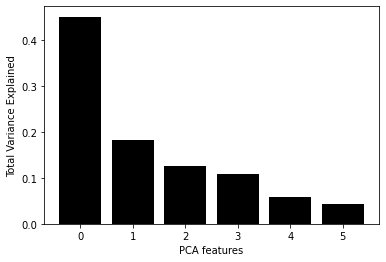

In [46]:
features = range(pca.n_components_)
pyplot.bar(features, pca.explained_variance_ratio_, color='black')
pyplot.xlabel('PCA features')
pyplot.ylabel('Total Variance Explained')
pyplot.xticks(features)

In [47]:
pca_df = pd.DataFrame(pca_fit)
pca_df.head()

,0,1,2,3,4,5
0,1.715173,-0.119361,-0.556983,-0.683565,0.155216,0.189762
1,-1.497848,2.660014,0.243649,0.763148,-1.231198,-0.238628
2,-1.733497,0.283364,-0.504691,-0.903372,-0.079166,-0.108043
3,-2.304449,0.246496,-0.583498,-1.153007,-0.317752,-0.059221
4,-0.056371,1.176775,0.833227,-1.077411,1.551029,-0.104456


Text(0, 0.5, 'PCA 2')

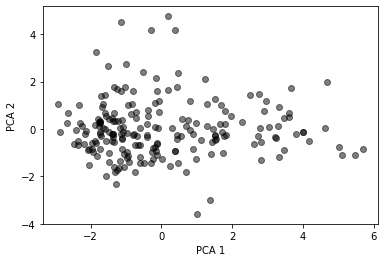

In [48]:
pyplot.scatter(pca_df[0], pca_df[1], alpha=.5, color='black')
pyplot.xlabel('PCA 1')
pyplot.ylabel('PCA 2')

From the bar plot, it seems that the optimal number of components is 3. From the scatter plot, it does seem like we can identify at least 1, perhaps two clusters from the data. 

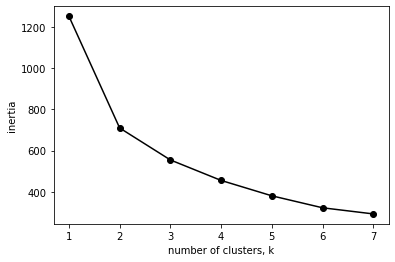

In [49]:
cluster_range = range(1,8)
inertias = []

for k in cluster_range:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_df.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
pyplot.plot(cluster_range, inertias, '-o', color='black')
pyplot.xlabel('number of clusters, k')
pyplot.ylabel('inertia')
pyplot.xticks(cluster_range)
pyplot.show()

The scree plot appears to indicate that the best number of clusters is two. The "elbow" shape in the plot shows a significant drop off after the number two.

In [50]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(artist_lvl_summary_stats)
artist_lvl_summary_stats["cluster"] = clusters

centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.58299253 -8.29148588  0.56116449  0.09788188  0.4232162   0.11565677
   0.20413722  0.4274284 ]
 [ 0.65241986 -5.142565    0.73143749  0.11645844  0.23637579  0.03580954
   0.21324842  0.53757684]]


In [51]:
artist_lvl_summary_stats.head()

,danceability,loudness,energy,speechiness,acousticness,instrumentalness,liveness,valence,cluster
Artist,,,,,,,,,
2AM,0.581600,-6.417889,0.591067,0.043758,0.438364,0.091031,0.155602,0.424971,1
2NE1,0.643076,-4.748420,0.796268,0.080922,0.123222,0.007202,0.461680,0.519280,1
2PM,0.672945,-4.254271,0.790771,0.070874,0.140090,0.018116,0.196061,0.615893,1
4Minute,0.706750,-3.880200,0.834700,0.058925,0.126199,0.010269,0.197645,0.658200,1
A.C.E,0.536444,-4.715278,0.765111,0.092961,0.108581,0.184890,0.190511,0.426672,1


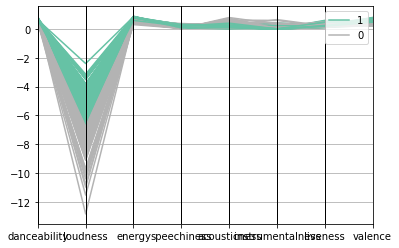

In [52]:
parallel_coordinates(artist_lvl_summary_stats, 'cluster', colormap=pyplot.get_cmap("Set2"))
pyplot.show()

In [53]:
cluster_0 = artist_lvl_summary_stats.loc[artist_lvl_summary_stats['cluster'] == 0]
cluster_1 = artist_lvl_summary_stats.loc[artist_lvl_summary_stats['cluster'] == 1]

In [54]:
cluster_0.index

Index(['Ailee', 'BEN', 'CODE KUNST', 'Crush', 'DAVICHI', 'DPR IAN', 'DPR LIVE',
       'Eddy Kim', 'Epik High', 'H.O.T.', 'Ha Dong Qn', 'Hyolyn', 'Jaurim',
       'Jewelry', 'Jung Seung Hwan', 'Junoflo', 'K.Will', 'KCM', 'Kim Bum Soo',
       'Kim Dong Ryul', 'LEE SEUNG HWAN', 'Lee Seung Chul ', 'Lee Soo Young',
       'LeeHi', 'Lyn', 'M.C the Max', 'MBLAQ', 'Microdot', 'Oceanfromtheblue',
       'Odee', 'PENOMECO', 'Park Boram', 'RM', 'Rain', 'Reddy', 'Roy Kim',
       'S.E.S.', 'SG Wannabe', 'SOYOU', 'Sam Kim', 'Samuel Seo',
       'Seo Taiji and Boys', 'Seotaiji', 'Sung Si Kyung', 'TAEYANG',
       'The Cross', 'Tiger JK (he was part of Drunken Tiger)', 'Wonstein',
       'Woo (우원재)', 'YUJU', 'Yang Da Il', 'Yerin Baek', 'Yoon Jong Shin',
       'Yoon Mirae', 'Zion.T', 'god', 'homieduel'],
      dtype='object', name='Artist')

In [55]:
cluster_1.index

Index(['2AM', '2NE1', '2PM', '4Minute', 'A.C.E', 'AOA', 'ASH ISLAND', 'ATEEZ',
       'Akmu', 'Apink',
       ...
       'WONHO', 'Wanna One', 'Wonder Girls', 'YUMDDA', 'YunB', 'f(x)', 'iKON',
       'lIlBOI (lilboi)', 'pH-1', 'punchnello'],
      dtype='object', name='Artist', length=149)